# Exploring_Features

In [1]:
# Import your libraries:

import os

%matplotlib inline

import numpy as np
import pandas as pd


import sys
sys.path.append('../')

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')




# https://www.kaggle.com/c/diamonds-datamad0921

In [2]:
diamonds_df = pd.read_csv("../data/train.csv")

## EXPLORE DATA

In [3]:
diamonds_df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [4]:
diamonds_df.shape

(40455, 11)

In [5]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


#### Correlation Matrix

<AxesSubplot:>

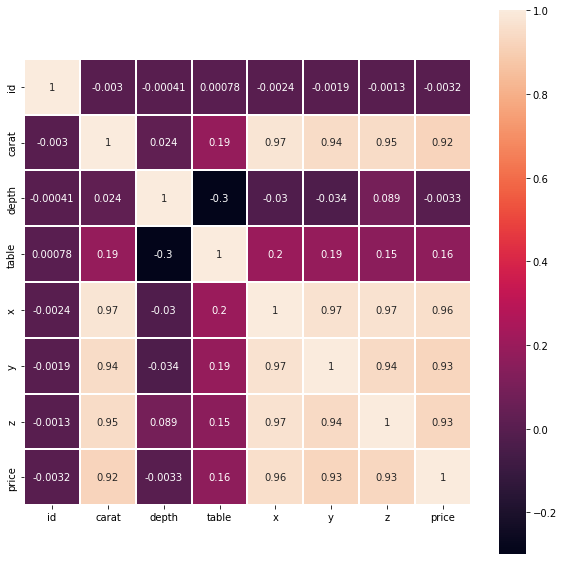

In [6]:
plt.figure(figsize=(10,10))
corr = diamonds_df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True,linewidth=2)


In [16]:
categ_list = ["cut", "color", "clarity"]

for i in categ_list:
    print(i)
    print(diamonds_df[i].unique())

cut
['Premium' 'Ideal' 'Very Good' 'Fair' 'Good']
color
['D' 'E' 'F' 'G' 'H' 'I' 'J']
clarity
['SI2' 'VVS2' 'VS2' 'VS1' 'SI1' 'VVS1' 'IF' 'I1']


In [17]:
for i in categ_list:
    print(i)
    print(round((diamonds_df[i].value_counts()/diamonds_df[i].count())*100),3)
    print()

cut
Ideal        40.0
Premium      26.0
Very Good    22.0
Good          9.0
Fair          3.0
Name: cut, dtype: float64 3

color
G    21.0
E    18.0
F    18.0
H    15.0
D    13.0
I    10.0
J     5.0
Name: color, dtype: float64 3

clarity
SI1     24.0
VS2     23.0
SI2     17.0
VS1     15.0
VVS2     9.0
VVS1     7.0
IF       3.0
I1       1.0
Name: clarity, dtype: float64 3



#### PRICE ~ CARAT

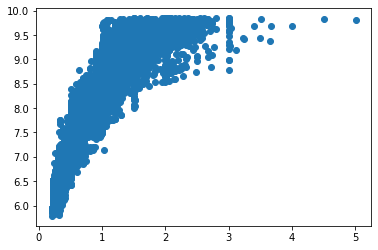

In [7]:
plt.scatter(diamonds_df.carat,diamonds_df.price)

#### PRICE ~ CUT

#### "Premium" cut are the most expensive diamonds, followed by "Very Good", "Good", "Fair", and "Ideal"

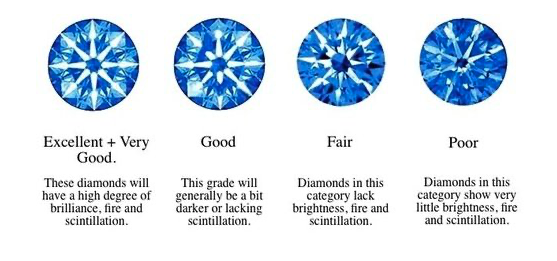

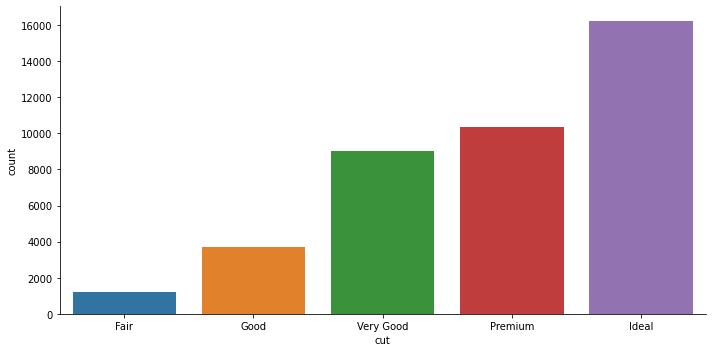

In [9]:
sns.catplot(x='cut', data=diamonds_df , kind='count',aspect=2,order=['Fair','Good','Very Good','Premium','Ideal'] )

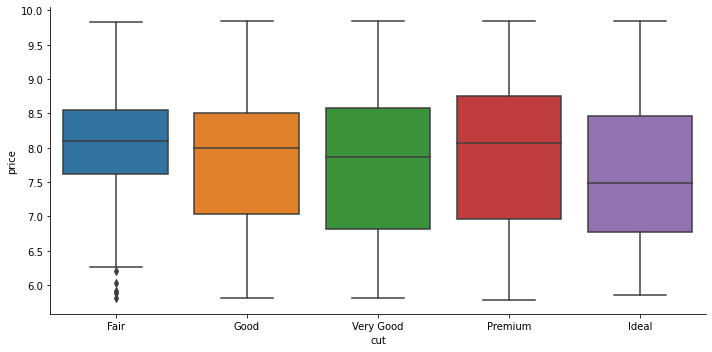

In [14]:
sns.catplot(x='cut', y = 'price',data=diamonds_df ,aspect=2,kind='box' ,order=['Fair','Good','Very Good','Premium','Ideal'])

#### PRICE ~ COLOR

#### It seems like "price" is also influence by the color , being the transparent ones the most rare

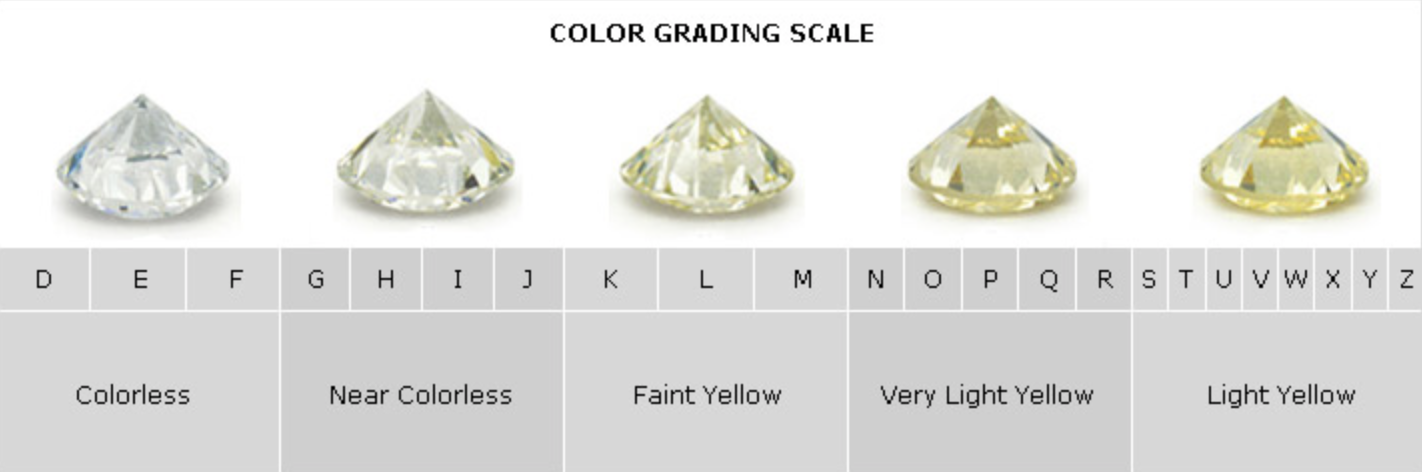

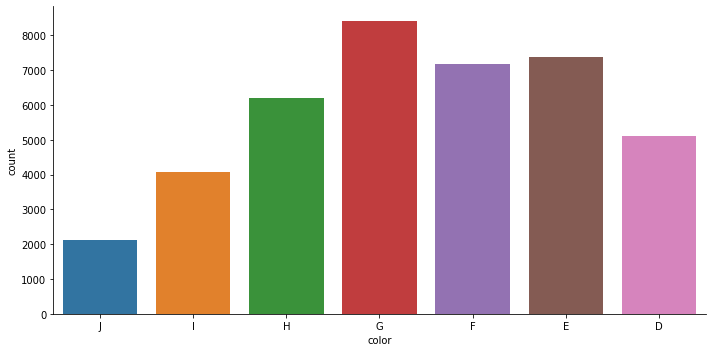

In [10]:
sns.catplot(x='color', data=diamonds_df , kind='count',aspect=2 ,order=['J','I','H','G','F','E','D'])

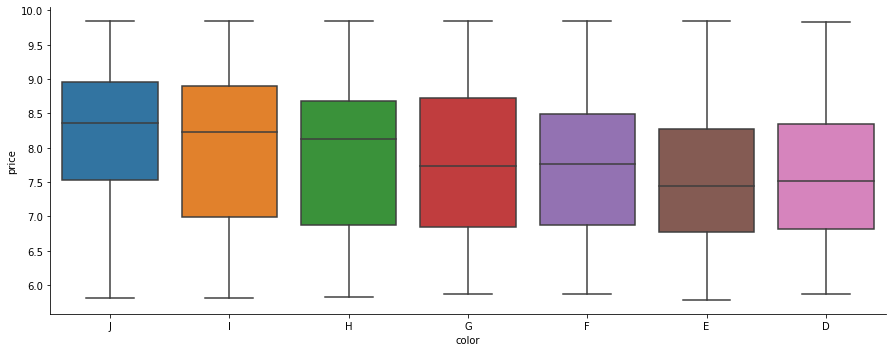

In [15]:
sns.catplot(x='color', y='price', data=diamonds_df ,aspect=2.5,kind='box',order=['J','I','H','G','F','E','D'] )

#### CLARITY ~ PRICE

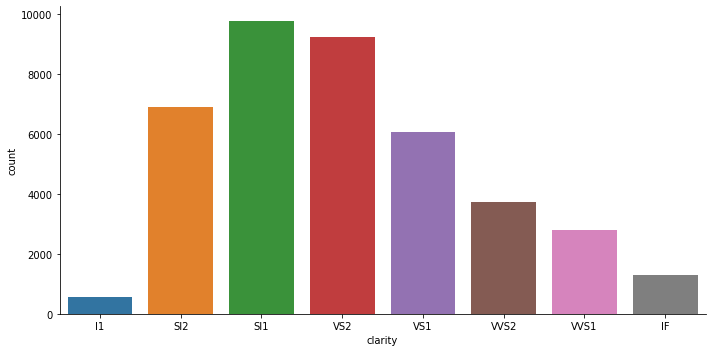

In [18]:
sns.catplot(x='clarity', data=diamonds_df , kind='count',aspect=2 ,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

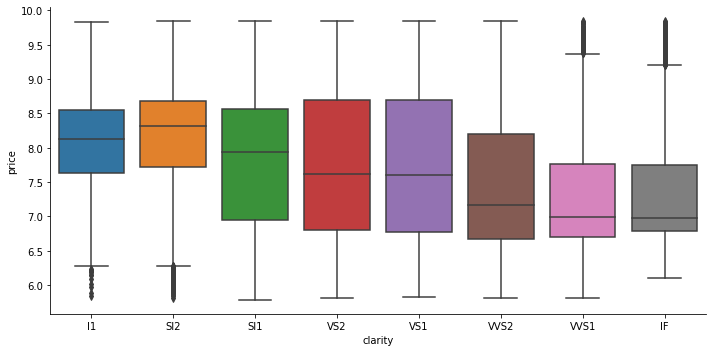

In [19]:
sns.catplot(x='clarity',y='price',data=diamonds_df, kind='box',aspect=2,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

#### PRICE ~ DEPTH

<function matplotlib.pyplot.show(close=None, block=None)>

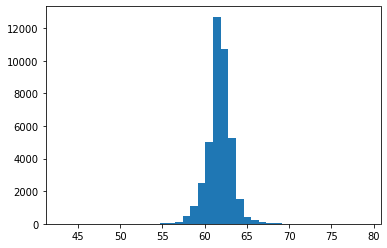

In [20]:
plt.hist(x='depth',data=diamonds_df,bins=40)
plt.show

#### x, y and z dimensions

(2.0, 10.0)

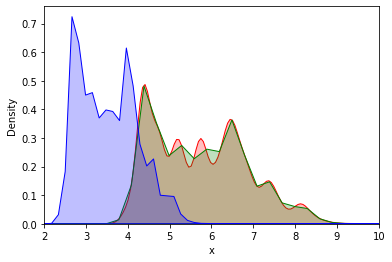

In [21]:
sns.kdeplot(diamonds_df['x'] ,shade=True , color='r' )
sns.kdeplot(diamonds_df['y'] , shade=True , color='g' )
sns.kdeplot(diamonds_df['z'] , shade= True , color='b')
plt.xlim(2,10)

#### Seems these categorical columns are influence by the price

In [22]:
for i in diamonds_df.columns:
    num = 0
    num += diamonds_df[i][diamonds_df[i]==0].count()
    print(num)

1
0
0
0
0
0
0
7
6
17
0


In [23]:
diamonds_df.loc[(diamonds_df['x']==0) | (diamonds_df['y']==0) | (diamonds_df['z']==0)]

,id,carat,cut,color,clarity,depth,table,x,y,z,price
1249,1249,2.25,Premium,I,SI1,61.3,58.0,8.52,8.42,0.0,9.642
3185,3185,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,9.661
4057,4057,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,7.664
4401,4401,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,8.215
7910,7910,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,8.545
8174,8174,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,8.252
8820,8820,2.25,Premium,H,SI2,62.8,59.0,0.00,0.00,0.0,9.800
10669,10669,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,8.462
10881,10881,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,8.061
12992,12992,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,9.810
